## Objetivo: Entrenar un modelo de regresión multivariable

Los siguientes datos se desconocen su fuente, por lo cual el siguiente notebook debe tomarse para fines académicos.

El objetivo es crear un modelo de regresión multivariable para predecir el puntaje de felicidad de un individuo dadas las variables:

## Expected Values

La variable columnas, al final de las celdas, esperan los valores a continuación:

columnas = ['Age',
 'daily_screen_time',
 'days_no_media_clean',
 'excercise_week_clean',
 'facebook',
 'instagram',
 'linkedin',
 'tiktok',
 'twitter',
 'youtube',
 'Gender_Female',
 'Gender_Male',
 'wellbeing_index']

valores = [[34, 10, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1, 4]] ----> Mi data!

El único punto es crítico de valorar el wellbeing Index, que debe ser calculado por el usuario dado su sleep_quality and stree_level


Es crítico mencionar que se colapsarón algunas columnas dado los VIF tests.

También se han realizado algunas pruebas de KDE, y el uso de la función Quad, para realizar integraciones dados dos limites. Puede que esto sea ruido para algunas personas.

Enjoy.


Nota. R2 = 0.64 so, la puntuación final no tiene todas las variables computadas, pero bajo este modelo podria darte una puntuación de felicidad.



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayeshaimran123/social-media-and-mental-health-balance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-media-and-mental-health-balance


In [2]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

archivo = os.listdir(path)[0]
data = pd.read_csv(f'{path}/{archivo}')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


## Nota

He optado por eliminar 'Other' de esta muestra.

In [3]:
data = data[data['Gender'] != 'Other']

<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='Days_Without_Social_Media'>

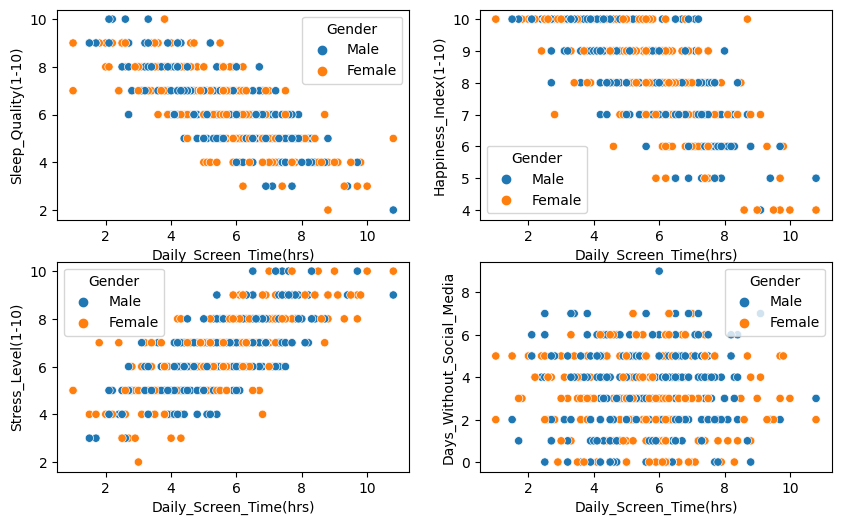

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (10, 6))



sns.scatterplot(data = data,
                x = 'Daily_Screen_Time(hrs)',
                y = 'Sleep_Quality(1-10)',
                hue = 'Gender',
                ax = ax[0, 0]

             )

sns.scatterplot(data = data,
                x = 'Daily_Screen_Time(hrs)',
                y = 'Happiness_Index(1-10)',
                hue = 'Gender',
                ax = ax[0, 1]

             )

sns.scatterplot(data = data,
                x = 'Daily_Screen_Time(hrs)',
                y = 'Stress_Level(1-10)',
                hue = 'Gender',
                ax = ax[1, 0]

             )

sns.scatterplot(data = data,
                x = 'Daily_Screen_Time(hrs)',
                y = 'Days_Without_Social_Media',
                hue = 'Gender',
                ax = ax[1, 1]

             )

<Axes: >

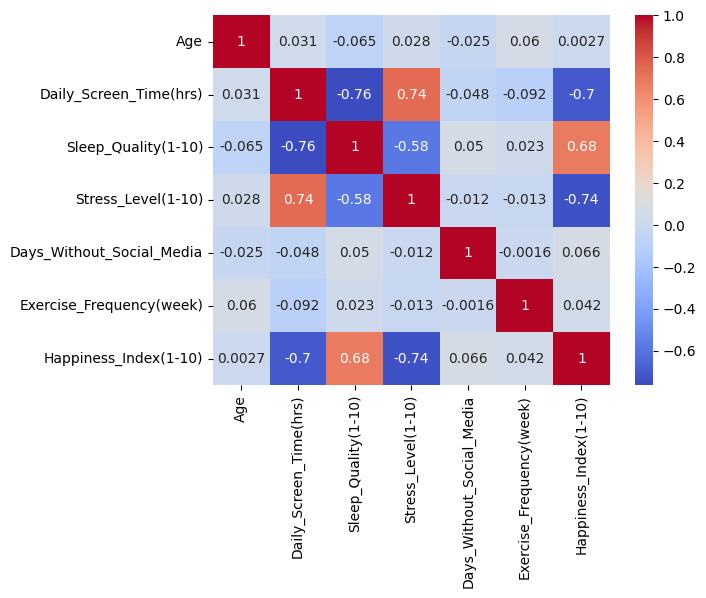

In [5]:
sns.heatmap(data.corr(numeric_only=True),
            annot = True,
            cmap='coolwarm',
            )

<Axes: ylabel='Frequency'>

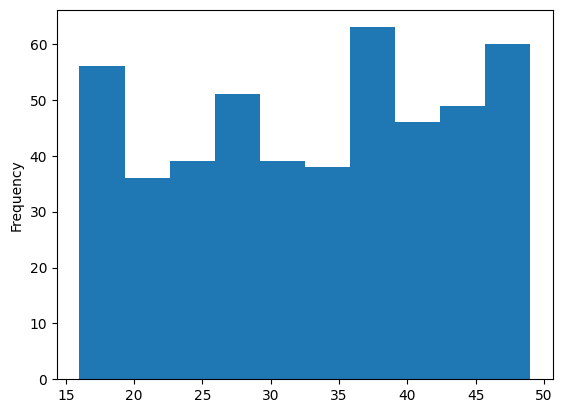

In [6]:
data['Age'].plot(kind = 'hist')

## Not normal but Bootstrap

Vamos a hacer bootrasp to this

In [7]:
import random

def bootstrap_medias(columna):

  times_to_bost = 10000 ## regula el ciclo global
  n_times = int(len(columna)) ## regula las muestras de cada run, MEti un update de correción elimine /2
  data_bost = [] # Almacena la data global

  for time in range(0, times_to_bost):

    local_bost = [] # almacena cada run

    for observacion in range(0, n_times):

      dato = columna[random.randint(0, len(columna) - 1)]
      local_bost.append(dato)

    np_local = np.array(local_bost)
    dato_bot = np_local.mean()
    data_bost.append(dato_bot)

  return data_bost

datos_columna = data['Age'].values

datos_bootstraped = bootstrap_medias(datos_columna)

edades = pd.DataFrame(
    datos_bootstraped,
    columns = ['edades']
)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: >

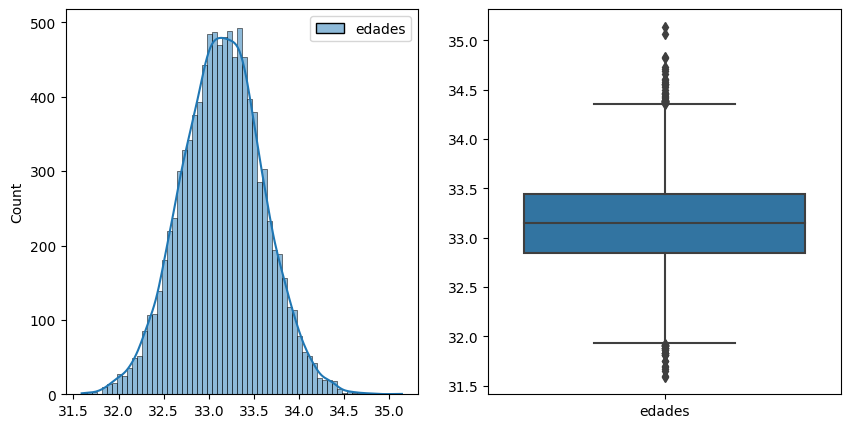

In [8]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

sns.histplot(edades, ax = axes[0], kde = True)
sns.boxplot(edades, ax = axes[1])

In [9]:
edades.describe()
edades_media = edades.mean().values
edades_std = edades.std().values

print(f'Media {edades_media}, STD {edades_std}')


Media [33.14864382], STD [0.45082609]


In [10]:
quantil_025 = edades.quantile(q=0.025).values
quantil_975 = edades.quantile(q=0.975).values

print(f'IC 95% ≈ [{quantil_025}, {quantil_975}]')


IC 95% ≈ [[32.26409853], [34.03149895]]


((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([31.59119497, 31.59748428, 31.64989518, ..., 34.83018868,
         35.06079665, 35.13836478])),
 (0.4509093456935385, 33.14864381551363, 0.9998768389806874))

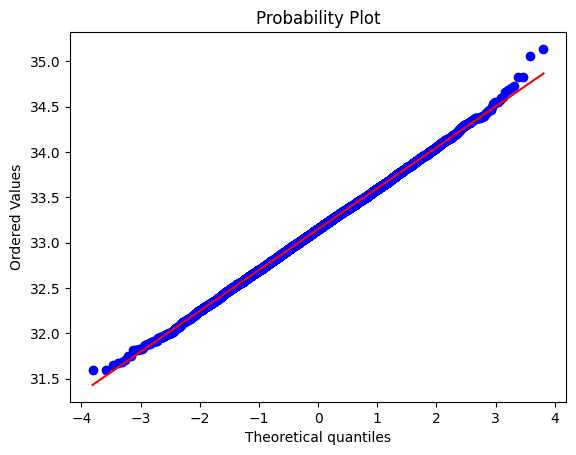

In [11]:
from scipy import stats

fig, ax = plt.subplots()
stats.probplot(edades['edades'], plot=ax)


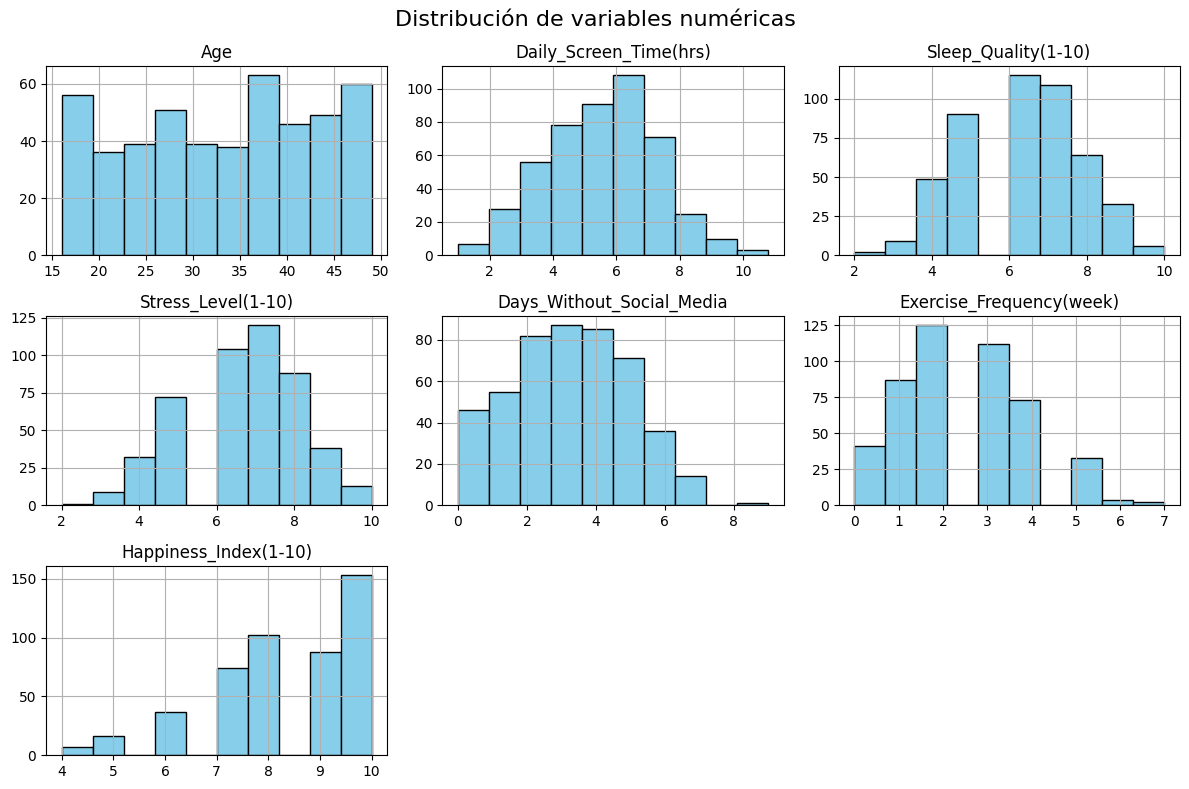

In [12]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='Density'>

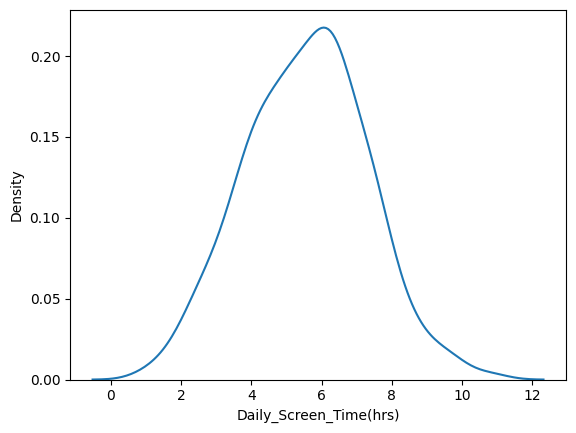

In [13]:
daily_time_column = data['Daily_Screen_Time(hrs)']
sns.kdeplot(daily_time_column)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='Count'>

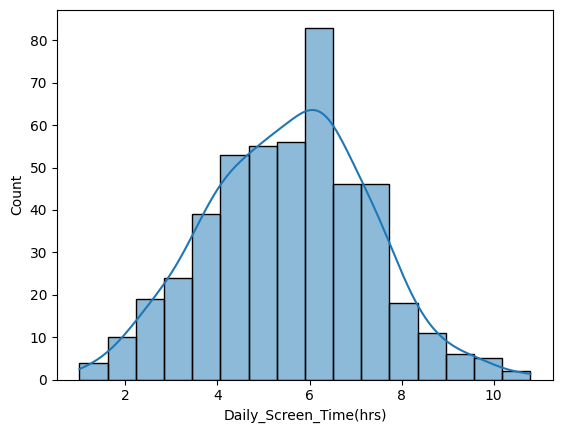

In [14]:
sns.histplot(data = data,
             x = 'Daily_Screen_Time(hrs)',
             kde = True
             )

## Reglas de un Kernel

Silverman

h = 1.06

Scott

Mejor Bandwidth 0.5455594781168519
P(4 <= X <= 6) es 0.380197 (Error estimado) 1.3e-14


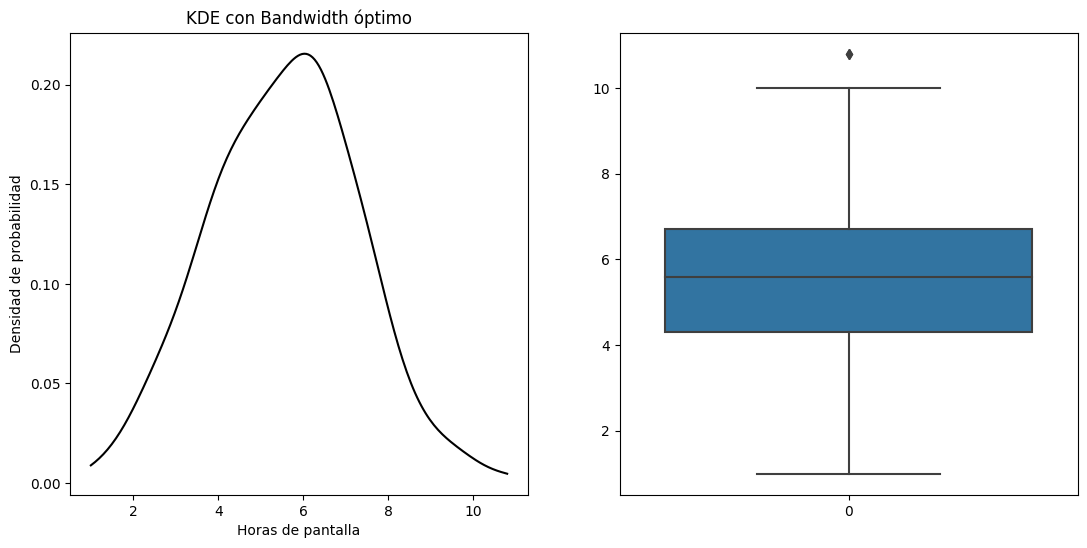

In [15]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.integrate import quad
import numpy as np

algoritmo = 'gaussian'

def f(x):
  """
  Esta función devuelve la densidad estimada en x
  """
  x = np.atleast_1d(x).reshape(-1, 1)
  return np.exp(kde.score_samples(x))[0]

X = data['Daily_Screen_Time(hrs)'].values.reshape(-1,1)

params = {'bandwidth' : np.logspace(-1, 1, 20)}

grid = GridSearchCV(KernelDensity(kernel = algoritmo), params)
grid.fit(X)

best_h = grid.best_estimator_.bandwidth
print(f'Mejor Bandwidth', best_h)

kde = KernelDensity(kernel = algoritmo, bandwidth= best_h).fit(X)

##
## Un KDE tiene dentro un vector de datos X
##

x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

log_dens = kde.score_samples(x_plot)

prob, err = quad(f, 4, 6)

fig, axes = plt.subplots(1, 2, figsize = (13, 6))

axes[0].plot(x_plot, np.exp(log_dens), color='black')
axes[0].set_title('KDE con Bandwidth óptimo')
axes[0].set_xlabel('Horas de pantalla')
axes[0].set_ylabel('Densidad de probabilidad')

boxplot = sns.boxplot(data['Daily_Screen_Time(hrs)'],
                      ax = axes[1])


print(f'P(4 <= X <= 6) es {prob:4f} (Error estimado) {err:.1e}')

In [16]:
media = X.mean()
desv = X.std()
print(media, desv)


5.552410901467505 1.7422302674889258


In [17]:
kde.score_samples(X[:3])

array([-2.37543189, -1.55402651, -1.76900666])

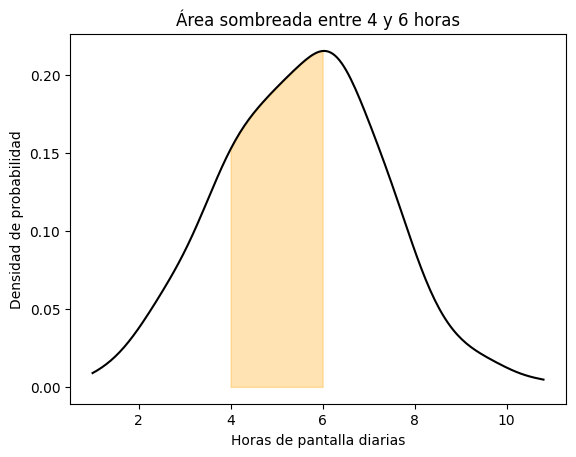

In [18]:
xs = np.linspace(4, 6, 100).reshape(-1,1)
ys = np.exp(kde.score_samples(xs))
plt.plot(x_plot, np.exp(log_dens), color='black')
plt.fill_between(xs.flatten(), ys, alpha=0.3, color='orange')
plt.title("Área sombreada entre 4 y 6 horas")
plt.xlabel("Horas de pantalla diarias")
plt.ylabel("Densidad de probabilidad")
plt.show()


In [19]:
data['happy_index_clean'] = data['Happiness_Index(1-10)'].astype(int)
data['stress_level_clean'] = data['Stress_Level(1-10)'].astype(int)
data['sleep_quality_clean'] = data['Sleep_Quality(1-10)'].astype(int)
data['days_no_media_clean'] = data['Days_Without_Social_Media'].astype(int)
data['excercise_week_clean'] = data['Exercise_Frequency(week)'].astype(int)

columns_to_drop = ['Stress_Level(1-10)', 'Sleep_Quality(1-10)',
            'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'User_ID', 'Social_Media_Platform']

data_to_train = (
    data.copy()
        .drop(columns=columns_to_drop, axis=1)
        .rename(columns={'Daily_Screen_Time(hrs)': 'daily_screen_time'})
)

data_to_heat = data_to_train.copy()
data_to_heat.drop(columns = 'Happiness_Index(1-10)', inplace = True)
corr = data_to_heat.corr(numeric_only = True)

data_to_train

datos_one_hot_encode = data_to_train['Gender'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output =False)

encoded = encoder.fit_transform(datos_one_hot_encode)

encoded_gen = pd.DataFrame(
    encoded,
    columns = encoder.get_feature_names_out(['Gender']),
    index = data.index
)

datos_one_hot_encode = data['Social_Media_Platform'].values.reshape(-1,1)
encoded = encoder.fit_transform(datos_one_hot_encode)


encoded_df = pd.DataFrame(
    encoded,
    columns = encoder.get_feature_names_out(['Social_Media_Platform']),
    index = data.index
)

data_final_train = pd.concat([data_to_train, encoded_df, encoded_gen], axis = 1)
data_final_train = data_final_train.drop(columns = 'Gender')

In [20]:
nombres = {'Social_Media_Platform_Facebook' : 'facebook',
          'Social_Media_Platform_Instagram' : 'instagram',
          'Social_Media_Platform_LinkedIn' : 'linkedin',
          'Social_Media_Platform_TikTok' : 'tiktok',
          'Social_Media_Platform_X (Twitter)' : 'twitter',
          'Social_Media_Platform_YouTube' : 'youtube'
          }

data_final_train = data_final_train.rename(columns = nombres)
data_final_train.drop(columns = 'Happiness_Index(1-10)', inplace = True)

In [21]:
data_final_train

,Age,daily_screen_time,happy_index_clean,stress_level_clean,sleep_quality_clean,days_no_media_clean,excercise_week_clean,facebook,instagram,linkedin,tiktok,twitter,youtube,Gender_Female,Gender_Male
0,44,3.1,10,6,7,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,5.7,8,8,7,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,34,7.0,8,7,4,5,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,38,6.6,8,7,5,4,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,26,7.8,7,8,4,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,6.9,10,7,5,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
496,43,5.6,9,6,7,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
497,41,7.7,8,7,5,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
498,23,4.2,9,7,9,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

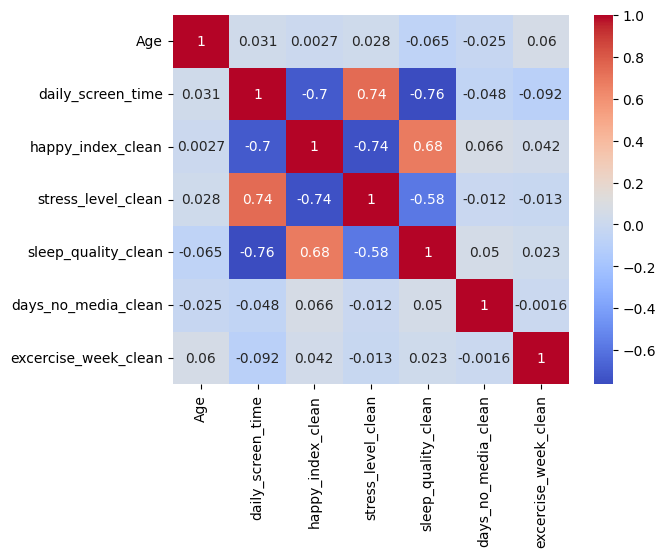

In [22]:

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X =data_to_heat.select_dtypes(include = 'number')

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,Age,11.896274
1,daily_screen_time,31.589699
2,happy_index_clean,49.766207
3,stress_level_clean,43.511455
4,sleep_quality_clean,40.779783
5,days_no_media_clean,3.858338
6,excercise_week_clean,3.985149


In [24]:
data_final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   477 non-null    int64  
 1   daily_screen_time     477 non-null    float64
 2   happy_index_clean     477 non-null    int64  
 3   stress_level_clean    477 non-null    int64  
 4   sleep_quality_clean   477 non-null    int64  
 5   days_no_media_clean   477 non-null    int64  
 6   excercise_week_clean  477 non-null    int64  
 7   facebook              477 non-null    float64
 8   instagram             477 non-null    float64
 9   linkedin              477 non-null    float64
 10  tiktok                477 non-null    float64
 11  twitter               477 non-null    float64
 12  youtube               477 non-null    float64
 13  Gender_Female         477 non-null    float64
 14  Gender_Male           477 non-null    float64
dtypes: float64(9), int64(6)
memo

In [25]:
data['sleep_quality_clean']

0      7
3      7
4      4
5      5
6      4
      ..
495    5
496    7
497    5
498    9
499    5
Name: sleep_quality_clean, Length: 477, dtype: int64

In [26]:
data['stress_level_clean']

0      6
3      8
4      7
5      7
6      8
      ..
495    7
496    6
497    7
498    7
499    8
Name: stress_level_clean, Length: 477, dtype: int64

In [27]:
data_final_train['wellbeing_index'] = (
    (data['sleep_quality_clean'] - data['stress_level_clean'])
)

columnas_to_x = list(data_final_train.columns.values)
columnas_to_x.remove('happy_index_clean')
columnas_to_x.remove('sleep_quality_clean')
columnas_to_x.remove('stress_level_clean')

columnas_to_x

['Age',
 'daily_screen_time',
 'days_no_media_clean',
 'excercise_week_clean',
 'facebook',
 'instagram',
 'linkedin',
 'tiktok',
 'twitter',
 'youtube',
 'Gender_Female',
 'Gender_Male',
 'wellbeing_index']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data_final_train[columnas_to_x] ## No incluye Happines
Y = data_final_train['happy_index_clean']

regresion = LinearRegression()

regresion.fit(X, Y)

print(f'Intercept : {regresion.intercept_}')
print('Coeficientes ', regresion.coef_)

Intercept : 8.48924732519799
Coeficientes  [ 0.00771339 -0.07497582  0.02848043  0.02927352  0.07680205 -0.07269279
 -0.07721486 -0.07497588  0.22484057 -0.0767591   0.00406177 -0.00406177
  0.40731999]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42
)

regresion.fit(X_train, y_train)
y_pred = regresion.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² (varianza explicada): {r2:.3f}')
print(f'MAE (error medio absoluto): {mae:.3f}')
print(f'RMSE (error cuadrático medio): {rmse:.3f}')


R² (varianza explicada): 0.644
MAE (error medio absoluto): 0.782
RMSE (error cuadrático medio): 0.946


In [31]:
pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': regresion.coef_
}).sort_values('Coeficiente', ascending=False)


,Variable,Coeficiente
12,wellbeing_index,0.405984
8,twitter,0.189568
4,facebook,0.149066
2,days_no_media_clean,0.036857
3,excercise_week_clean,0.018716
11,Gender_Male,0.012942
0,Age,0.009944
10,Gender_Female,-0.012942
9,youtube,-0.056938
5,instagram,-0.068175


In [32]:
import pandas as pd

# Definimos las columnas y los valores (¡en el mismo orden!)
columnas = ['Age',
 'daily_screen_time',
 'days_no_media_clean',
 'excercise_week_clean',
 'facebook',
 'instagram',
 'linkedin',
 'tiktok',
 'twitter',
 'youtube',
 'Gender_Female',
 'Gender_Male',
 'wellbeing_index']

valores = [[34, 10, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1, 4]]

# Creamos el DataFrame
yo_hoy = pd.DataFrame(valores, columns=columnas)

# Predicción
felicidad_predicha = regresion.predict(yo_hoy)

print(f"Tu felicidad estimada hoy es: {felicidad_predicha[0]:.2f} / 10 💫")


Tu felicidad estimada hoy es: 9.57 / 10 💫
